In [4]:
import pandas as pd

df =pd.read_csv("D:/Hassan/PYTHON/Notes/Energy Analytics/household_power_consumption.txt", sep=';')

C:\Software\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [18]:
df['Date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [20]:
df = df.drop(['Date','Time'], axis=1)
df = df.set_index('Date_time')

df = df.replace('?', np.nan)

In [34]:
df =df.fillna(method ='bfill')
df.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [36]:
for col in df:
    df[col] = df[col].astype('float')

In [43]:
df_hourly = df.resample('H', axis =0).sum()

In [52]:
df_hourly['hourly'] = df_hourly.index.hour
df_hourly.index = df_hourly.index.date

In [59]:
df_ten_mean = df_hourly.pivot_table(columns ='hourly')
# for 10 years, you get mean values for each hour

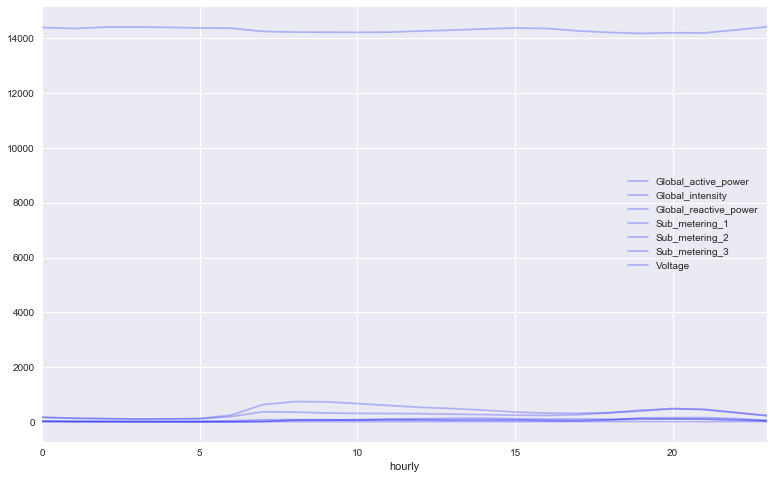

In [112]:
plt.style.use('seaborn')
df_ten_mean.T.plot(figsize=(13,8), legend=True, color='blue', alpha =0.25)

In [143]:
df_global['Hour']= df_hourly['hourly']
df_global_pivot = df_global.pivot_table(columns ='Hour')

C:\Software\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


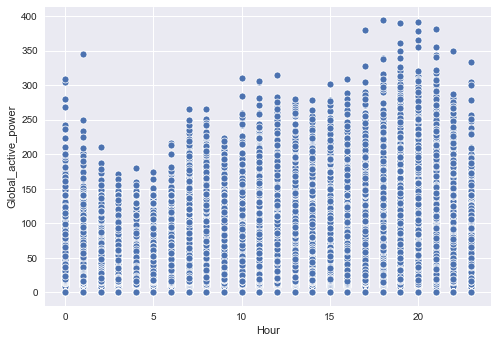

In [162]:
import seaborn as sns
sns.scatterplot(x='Hour' ,y ='Global_active_power', data = df_global)

In [169]:
df_global_pivot= df_global.pivot(columns ='Hour')
df_global_pivot.dropna(inplace =True)

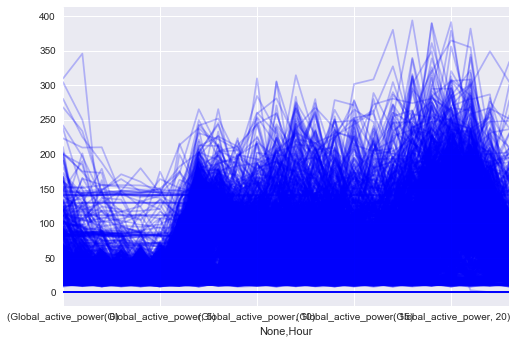

In [180]:
df_global_pivot.T.plot(legend =False, color ='blue', alpha = 0.25);

In [190]:
x_array = df_global_pivot.values.copy()
x_array.shape

(1456, 24)

In [191]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x_array)

In [192]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [193]:
sillhoute_scores = []
n_cluster_list = np.arange(2,31)
n_cluster_list

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [194]:
for n in n_cluster_list:
    kmeans = KMeans(n_clusters=n)
    cluster_found = kmeans.fit_predict(x_scaled)
    sillhoute_scores.append(silhouette_score(x_scaled, kmeans.labels_))

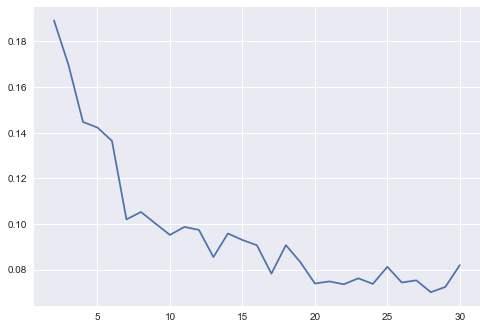

In [197]:
plt.plot(n_cluster_list, sillhoute_scores)

In [198]:
np.array(sillhoute_scores).max()
np.array(sillhoute_scores).argmax()+2

2

In [200]:
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(x_scaled)

In [203]:
df_global_pivot['km3'] = kmeans.labels_

In [207]:
df_global_pivot.set_index('km3', inplace =True)

In [237]:
df_global_pivot.set_index('km3', inplace =True)

In [314]:
df_global_pivot.xs(0).T.droplevel(0, axis=0)
#.droplevel(0, axis=0) method drops the global_active_power index level in the index 

km3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hour,,,,,,,,,,,,,,,,,,,,,
0,112.948,101.894,241.680,145.456,84.560,40.574,153.038,200.434,103.908,82.334,...,109.530,98.198,89.674,21.330,140.28,140.28,140.280,103.132,108.538,114.978
1,200.964,103.368,196.542,144.158,119.650,42.970,151.404,174.960,68.956,90.000,...,97.350,165.668,85.712,56.924,140.28,140.28,140.280,89.876,88.554,105.758
2,95.236,102.046,138.182,144.656,129.098,43.316,154.940,172.766,62.304,94.048,...,108.542,116.012,84.954,14.278,140.28,140.28,140.280,118.224,85.794,136.446
3,99.732,106.292,96.406,146.944,147.160,46.714,152.500,67.304,67.220,71.910,...,103.444,99.044,90.120,22.826,140.28,140.28,140.280,102.266,93.314,134.158
4,132.946,113.496,94.566,179.550,148.286,76.666,148.544,68.054,61.390,70.466,...,97.840,111.960,89.540,140.280,140.28,140.28,140.280,51.128,87.990,85.730
5,119.804,133.746,97.914,143.264,143.166,63.046,148.574,71.646,63.060,72.374,...,93.278,106.402,66.772,140.280,140.28,140.28,140.280,22.768,174.618,17.988
6,78.198,98.962,113.712,143.292,146.334,150.082,147.348,94.566,66.422,106.726,...,93.548,25.576,84.952,140.280,140.28,140.28,140.280,22.048,115.834,16.176
7,97.202,241.402,88.584,188.164,230.326,201.870,146.832,68.464,126.812,65.276,...,133.148,24.998,141.762,140.280,140.28,140.28,140.280,23.172,19.752,20.766
8,113.434,251.450,85.666,141.956,221.686,245.074,146.504,78.910,122.108,115.756,...,82.812,25.264,89.406,140.280,140.28,140.28,140.280,38.334,21.300,21.768


''

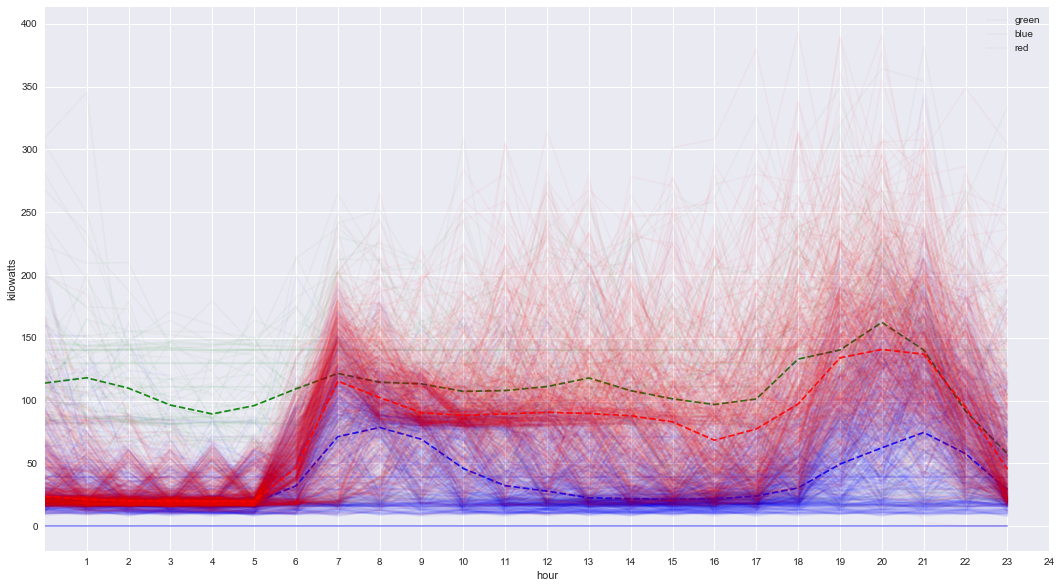

In [315]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
df_global_pivot.xs(0).T.droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.03, color='green')
df_global_pivot.xs(0).median().droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.9, color='green', ls ='--')
df_global_pivot.xs(1).T.droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.03, color='blue')
df_global_pivot.xs(1).median().droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.9, color='blue', ls ='--')
df_global_pivot.xs(2).T.droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.03, color='red')
df_global_pivot.xs(2).median().droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.9, color='red', ls ='--')
ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
;

In [318]:
from sklearn.manifold import TSNE
import matplotlib.colors

tsne = TSNE()
results_tsne = tsne.fit_transform(x_scaled)

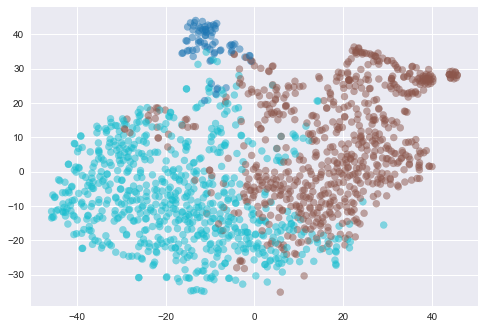

In [331]:
cmap = plt.get_cmap('tab10')
plt.scatter(results_tsne[:,0], results_tsne[:,1], c= df_global_pivot.index, cmap =cmap, alpha =0.5)

### Clusters are together, thus validating the quality of the model
